In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("Seattle_Bicycle.csv", index_col = 'Date', parse_dates=True)
data.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2019-11-01 00:00:00,12.0,7.0,5.0
2019-11-01 01:00:00,7.0,0.0,7.0
2019-11-01 02:00:00,1.0,0.0,1.0
2019-11-01 03:00:00,6.0,6.0,0.0
2019-11-01 04:00:00,6.0,5.0,1.0


In [6]:
data.columns = ['Total','East','West'] # col 명 단순화
data.dropna().describe()

,Total,East,West
count,150134.000000,150134.000000,150134.000000
mean,109.507420,49.640488,59.866932
std,139.596963,64.238184,86.696586
min,0.000000,0.000000,0.000000
25%,14.000000,6.000000,7.000000
50%,59.000000,27.000000,30.000000
75%,144.000000,67.000000,74.000000
max,1097.000000,698.000000,850.000000


<Figure size 720x1080 with 0 Axes>

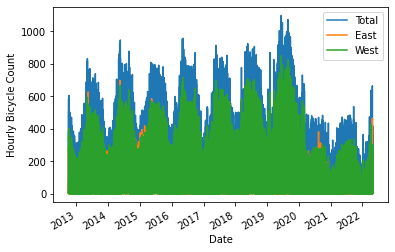

In [21]:
plt.figure(figsize=(10,15))
data.plot()
plt.ylabel('Hourly Bicycle Count')
plt.show() # hour 단위로 많으니 주 단위로 가자 

In [13]:
weekly = data.resample('W').sum()
weekly

,Total,East,West
Date,,,
2012-10-07,28584.0,14594.0,13990.0
2012-10-14,33590.0,17358.0,16232.0
2012-10-21,31018.0,15892.0,15126.0
2012-10-28,26874.0,13802.0,13072.0
2012-11-04,24388.0,12816.0,11572.0
...,...,...,...
2022-04-03,14827.0,5958.0,8869.0
2022-04-10,14885.0,5954.0,8931.0
2022-04-17,12732.0,5086.0,7646.0


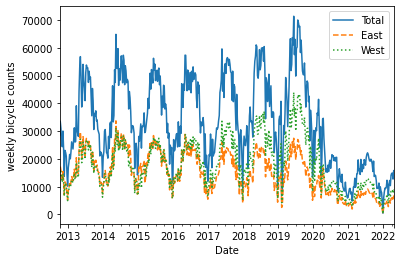

In [15]:
weekly.plot(style=['-','--',':'])
plt.ylabel('weekly bicycle counts')
plt.show()

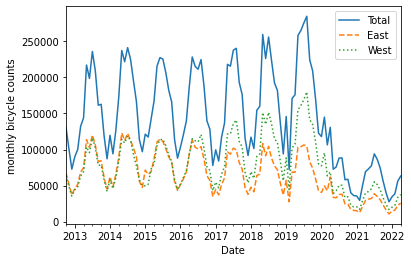

In [18]:
monthly = data.resample('M').sum()

monthly.plot(style= ['-', '--', ':'])
plt.ylabel('monthly bicycle counts')
plt.show()

Text(0, 0.5, 'mean hourly counts')

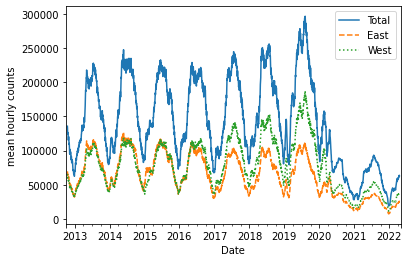

In [19]:
daily = data.resample('D').sum()
daily.rolling(30, center=True).sum().plot(style=['-','--',':'])
plt.ylabel('mean hourly counts')

<AxesSubplot:xlabel='Date'>

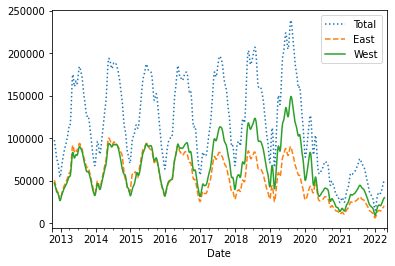

In [23]:
daily.rolling(50, center=True,
              win_type='gaussian').sum(std=10).plot(style=[':','--','-']) # 가우시안 평활 

<AxesSubplot:xlabel='time'>

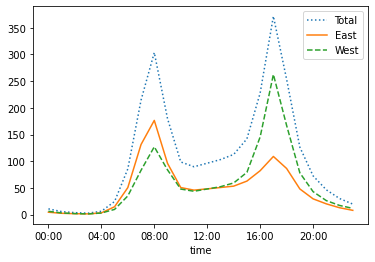

In [25]:
# 시간대 별 확인

by_time = data.groupby(data.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks = hourly_ticks, style = [':','-','--'])

<AxesSubplot:>

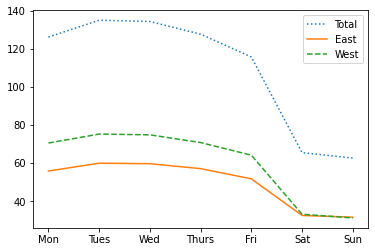

In [26]:
# 요일 별 확인

by_weekday = data.groupby(data.index.dayofweek).mean()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot(style=[':', '-', '--'])

AttributeError: 'DataFrame' object has no attribute 'ix'

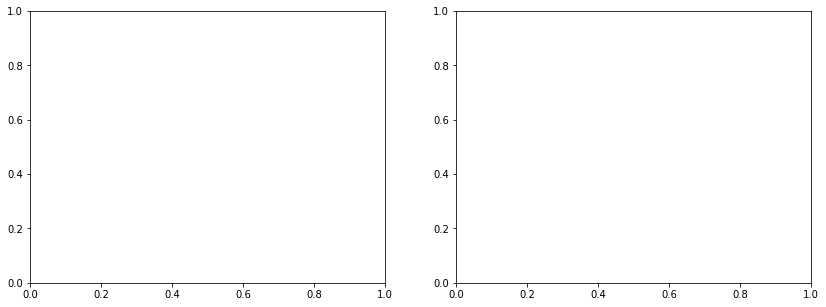

In [34]:
weekend = np.where(data.index.weekday < 5, 'Weekday', 'Weekend')
by_time = data.groupby([weekend, data.index.time]).mean()

fig, ax = plt.subplots(1,2, figsize=(14,5)) 

by_time.ix['Weekday'].plot(ax = ax[0], title = 'Weekdays', xticks = hourly_ticks, style = [':','-','--'])
by_time.ix['Weekend'].plot(ax = ax[1], title = 'Weekends',
                           xticks = hourly_ticks, style = [':','-','--'])

Total    float64
East     float64
West     float64
dtype: object